# Assignment 1: Data Exploration and Analysis
### Allen Ansari, Chad Madding and Yongjun (Ian) Chu 


## Business Understanding
### Choosing the cadiovascular diseases dataset
Cardiovascular diseases (CVD) are the no. 1 cause of death in US each year. To reduce the death rate, the best approach is by early detection and screening. An efficeint way would be to predict the probablity of a patient having CVD based on results from medical examinations, such as blood pressure values and glucose content. 

Here, we obtained a CVD dataset from Kaggle. It consists of 70,000 records of patients data in 12 features, such as age, gender, systolic blood pressure, diastolic blood pressure and CVD status(binary, 1 or 0). The purpose of this dataset was to determine which medical aspects had the most bearing on whether a patient would had CVD or not. 

To mine useful knowledge from the dataset, we will establish a prediction algorithm chosen from some commonly used classification models, including logistic regression, to find a relationship between a specific attribute or group of attributes and the probability of having CVD for a patient. To measure the effectiveness of our prediction algorithm, we will use the cross-validation. For each evaluation, accuracy metric for binary classification models called Area Under the (Receiver Operating Characteristic) Curve (AUC) will be generated. AUC measures the ability of the model to predict a higher score for positive examples as compared to negative examples. We can get the overall performance measure by computing the average of the AUC metrics from cross-validations for any particular model. Results from different models will be compared and the best one(s) will be chosen. 

## Data Understanding

### Data description

We will be peforming an analysis of the cadiovascular diseases dataset found on Kaggle (https://www.kaggle.com/sulianova/cardiovascular-disease-dataset). Our analysis will consist of exploring the statistical summaries of the features, visualizing the attributes, and making conclusions from the visualizations and analysis.

Our task is to predict the presence or absence of cardiovascular disease (CVD) using the patient examination results. 

There are 3 types of input features:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

|Feature   |Variable Type   |Variable   |Value Type   |
|:---------|:--------------|:---------------|:------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

For any binary data type, "0" means "No" and "1" means "Yes". All of the dataset values were collected at the moment of medical examination.

### Data Quality

Data import and cleanup:

In [1]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.style.use('ggplot')

import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

from pandas.plotting import scatter_matrix

#Bring in data set
df = pd.read_csv('data/cardio_train.csv', sep=';') #read in the csv file

# Show the dimention and the first 5 rows of the dataset
print(df.shape)
df.head()

(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


The original dataset has 70,000 rows and 13 attibutes. We will drop the "id" attribute as it is not needed in this assignment.

In [2]:
# drop 'id' column 
if 'id' in df:
    del df['id']

#df.drop('id',axis=1,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


Are there any NAs or missing values in the dataset?

In [3]:
# Total missing values for each feature
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [4]:
df.isnull().values.any()

False

No, there are no missing values or NAs in the dataset.

In [5]:
# Are there any non-numbers in each column?
for column in df:
    print(column)
    cnt=0
    for row in df[column]:
        try:
            float(row)
            #df.loc[cnt, 'ap_lo']=row
        except ValueError:
            print("there is a non-numeric value: " + row)
            pass
        cnt+=1
        
print(cnt)

age
gender
height
weight
ap_hi
ap_lo
cholesterol
gluc
smoke
alco
active
cardio
70000


No, all values in the dataset are numeric.

In [6]:
#Are there any duplicate entries in the dataset?
#duplicateRowsDF = df[df.duplicated(keep=False)]
duplicateRowsDF = df[df.duplicated(keep='first')]

print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

print(f"\nThere are {len(duplicateRowsDF)} duplicated entries in the dataset!")


Duplicate Rows except first occurrence based on all columns are :
         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
10562  20495       1     165    70.0    120     80            1     1      0   
21784  16793       1     165    68.0    120     80            1     1      0   
38505  18988       1     164    65.0    120     80            1     1      0   
40365  14552       1     158    64.0    120     80            1     1      0   
42450  18353       1     169    67.0    120     80            1     1      0   
44653  16937       2     170    70.0    120     80            1     1      0   
45125  21280       1     165    65.0    120     80            1     1      0   
45748  22077       1     175    69.0    120     80            1     1      0   
45810  21230       1     164    62.0    120     80            1     1      0   
48917  21945       1     165    60.0    120     80            1     1      0   
50432  17493       2     169    74.0    120     80    

For duplicated entries, we think they were just from mistakes by entering more than once. These 24 entries should be removed. 

In [7]:
#remove duplicates in the dataframe
df.drop_duplicates(keep = 'first', inplace = True) 
df.shape

(69976, 12)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


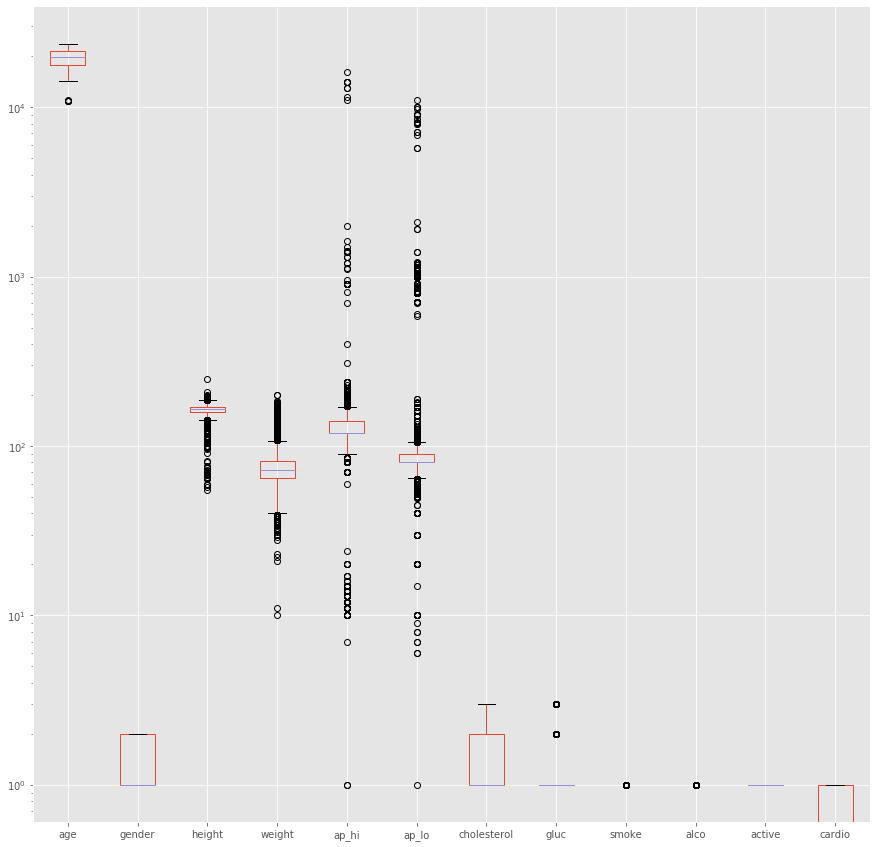

In [8]:
#are there any outliers in the dataset?

#boxplot of all the varibles
plt.figure(figsize=(15, 15))
ax = df.boxplot()
ax.set_yscale('log')

df.describe()


From the simple statistical information and the boxplots above, we can easily see that there are some incorrect data points there. For example, the blood pressure has negative readings and the maximum readings for both Systolic blood pressure (ap_hi) and Diastolic blood pressure (ap_lo) are over 10,000, which are obviously mistakes. 

In [9]:
#to only keep the entries between 97.5% quantile and 2.5% quantile for ap_hi and ap_lo
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)
df.shape

(66169, 12)

In [10]:
#to find how many rows where the Diastilic pressure is higher than systolic one, which is obviously impossible in reality.
print(df.shape)
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

(66169, 12)
Diastilic pressure is higher than systolic one in 0 cases


Therefore, after cleaning the data for ap_hi and ap_lo should make sense now. let's plot the boxplot again for these two.

After cleaning Diastilic pressure is higher than systolic one in 0 cases.


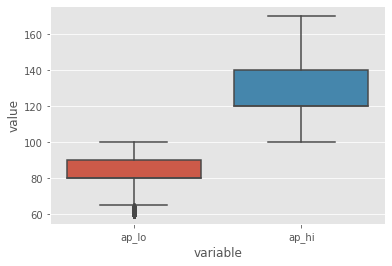

In [11]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("After cleaning Diastilic pressure is higher than systolic one in {0} cases.".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

We also notice that there are some abnormal values in column "weight". The minimum weight is 10 kg and maximum 200 kg. Obviously these values are outliers as they don't represent the values for normal people. So we decided to remove these by only keeping the vaues from 2.5 to 97.5 percentile range. 

In [12]:
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

print(df.shape)

(63055, 12)


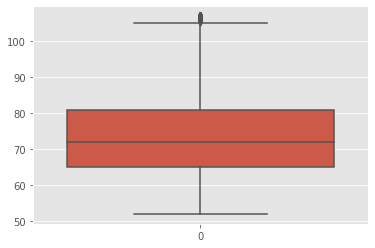

In [13]:
#boxplot to see the distribution of "weight"
sns.boxplot(data = df["weight"])

After cleaning the data entries for ap_hi, ap_lo and weight, the data is ready for exploration.

### Simple Statistics

We can now start to look at some simple statistics for the numeric values in the data set.

In [14]:
#A summary of the dataframe
df.info()
#Stats of ordinal and continous data
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63055 entries, 0 to 69999
Data columns (total 12 columns):
age            63055 non-null int64
gender         63055 non-null int64
height         63055 non-null int64
weight         63055 non-null float64
ap_hi          63055 non-null int64
ap_lo          63055 non-null int64
cholesterol    63055 non-null int64
gluc           63055 non-null int64
smoke          63055 non-null int64
alco           63055 non-null int64
active         63055 non-null int64
cardio         63055 non-null int64
dtypes: float64(1), int64(11)
memory usage: 8.8 MB


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,63055.000000,63055.000000,63055.000000,63055.000000,63055.000000,63055.000000,63055.000000,63055.000000,63055.000000,63055.000000,63055.000000,63055.000000
mean,19482.116676,1.352756,164.546586,73.660693,126.212243,81.182016,1.355896,1.220633,0.087019,0.052779,0.803505,0.492998
std,2461.400396,0.477831,7.970448,11.816099,14.318266,8.334357,0.673440,0.567579,0.281866,0.223594,0.397350,0.499955
min,10798.000000,1.000000,55.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17698.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19711.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21333.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,107.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


The count, mean, std vlaues for each variable are shown in above table. 

The interesting things we can find from above table are that: 1) the mean height being 164 cm suggests that the dataset was unlikely generated from US or Europe, as people from these regions are generally taller than 170 cm. 2) The mean values of ap_hi and ap_lo are 126 and 81, respectively. These values are quite reasonable for Systolic blood pressure and Diastolic blood pressure.

How do the statistics look like for different genders (1 and 2)? Which levels are for female and male, respectively? 

In [15]:
df[df.gender == 1].describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,40812.000000,40812.0,40812.000000,40812.000000,40812.000000,40812.000000,40812.000000,40812.000000,40812.000000,40812.000000,40812.000000,40812.000000
mean,19539.196927,1.0,161.662330,72.350592,125.780138,80.888121,1.377879,1.231746,0.016760,0.024870,0.801897,0.495614
std,2418.675328,0.0,6.898025,11.690820,14.424434,8.401162,0.689969,0.581168,0.128372,0.155731,0.398575,0.499987
min,10859.000000,1.0,55.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,18079.000000,1.0,157.000000,64.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19743.000000,1.0,162.000000,70.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21343.250000,1.0,166.000000,80.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23701.000000,1.0,250.000000,107.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df[df.gender == 2].describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,22243.000000,22243.0,22243.000000,22243.000000,22243.000000,22243.000000,22243.000000,22243.000000,22243.000000,22243.000000,22243.000000,22243.000000
mean,19377.384436,2.0,169.838691,76.064497,127.005080,81.721261,1.315560,1.200243,0.215933,0.103988,0.806456,0.488199
std,2534.637677,0.0,7.036775,11.666279,14.087282,8.183149,0.640062,0.541179,0.411477,0.305252,0.395084,0.499872
min,10798.000000,2.0,65.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17490.000000,2.0,165.000000,68.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19647.000000,2.0,170.000000,75.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21317.000000,2.0,174.000000,84.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.0,207.000000,107.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


We assume that men are taller than women on average. Therefore, the level 1 stands for female and level 2 for male since the mean height for level 1 is 162 cm, for level 2 is 170 cm. Furthermore, we noticed that more men are smoking and drinking alcohol (mean values of smoke and alco for men are 0.22 and 0.10 to 0.02 and 0.02 for wemen). Also, we realized that the number of female is almost two times the number of male.  We will look at this later at "the exceptional work" part.

### Data Visualization for Important Attributes

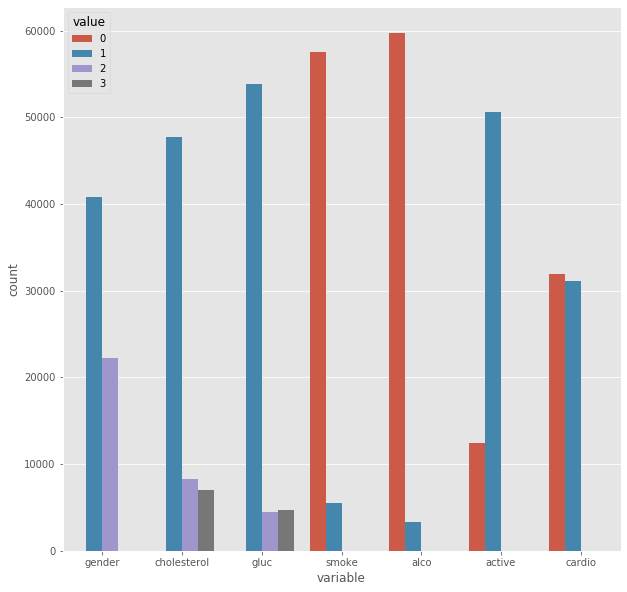

In [17]:
#Let's look at categorical variables in the dataset and their distribution
plt.figure(figsize=(10, 10))
df_categorical = df.loc[:,['gender','cholesterol','gluc', 'smoke', 'alco', 'active','cardio']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));


We can tell that female and male patients are not equally represented, with 2/3 belonging to one gender. For other categorical variables except cardio, it appears that there is always one type being dominant. For example, the level 0 in alco or smoke variable is the main type in the dataset. For cardio, the number of having disease is almost equal to the number of not having disease.

In [18]:
#to find important attibutes in this study, we can examine the mean / median for each variable 
#of having disease or not having disease
df.groupby(by='cardio').median()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,
0,19020,1,165,70.0,120,80,1,1,0,0,1
1,20397,1,165,74.0,130,80,1,1,0,0,1


In [19]:
df.groupby(by='cardio').mean()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,
0,18904.104038,1.356095,164.807657,71.842974,120.156965,78.50965,1.211455,1.172542,0.093434,0.056086,0.818261
1,20076.547803,1.349321,164.278099,75.530043,132.439523,83.93029,1.504439,1.270089,0.080422,0.049379,0.788329


Altough the median values didn't tell us much information about what attritutes are important, the mean values for some of the variables revealed something interesting. We can see that age, weight, ap_hi, ap_lo, cholesterol, gluc appear to have quite different values for having disease group and no-disese group. Other variables are not that much different from cardio of zero to one state. We use use boxplot or bargraph to show the effect.   

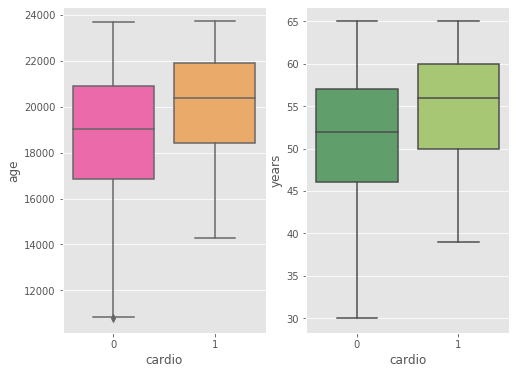

In [20]:
#investiate how age changes with cardio states
#we want to check how the plot looks like when converting age from days to years
df['years'] = (df['age'] / 365).round().astype('int')

plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='age',data=df,palette='spring')
plt.subplot(1,2,2)
sns.boxplot(x='cardio',y='years',data=df,palette='summer')

It appears that the youngest age to start getting cardio is close to 40. To further investigate this, we can plot a bargraph to show how ratio of getting cardio is changing with ages. 

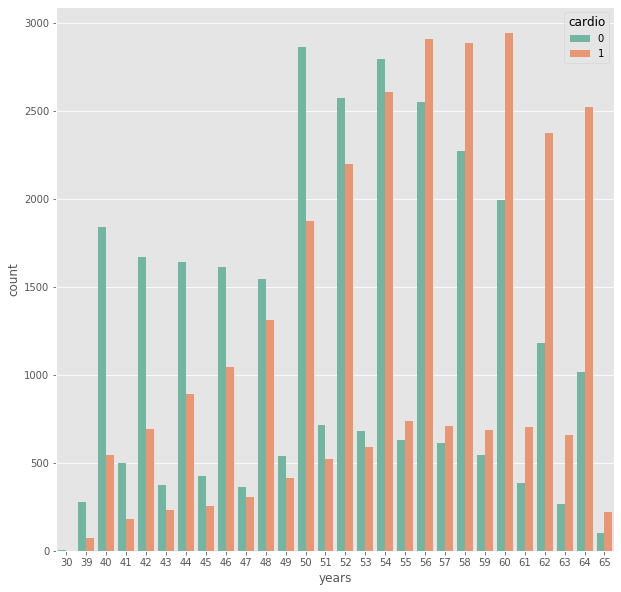

In [21]:
plt.figure(figsize=(10, 10))
sns.countplot(x='years', hue='cardio', data = df, palette="Set2")

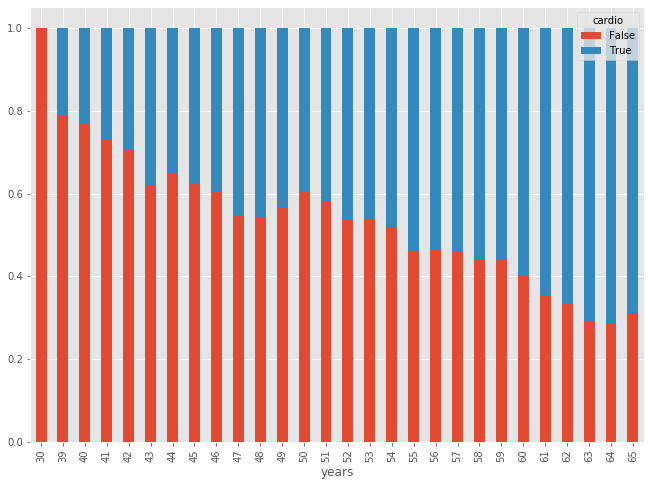

In [22]:
#plt.figure(figsize=(10, 10))
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

cardio_value = pd.crosstab([df['years']], df.cardio.astype(bool))
#print(cardio_value)
#cardio_value.plot(kind = "bar", stacked= True)

cardio_rate = cardio_value.div(cardio_value.sum(1).astype(float), axis=0) 
cardio_rate.plot(kind = 'bar', stacked = True)

It can be observed from above 2 graphs that people over 55 of years old are more likely to have CVD.

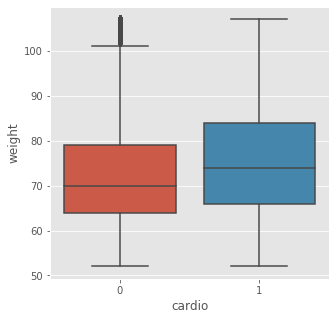

In [23]:
#investiate how weight change with cardio states
#plt.figure(figsize=(10, 10))
rcParams['figure.figsize'] = 5, 5

sns.boxplot(x='cardio',y='weight',data=df)

Obviously, the mean weight of patients having CVD is larger than that from no-CVD people. Because weight is related to height and other factors, so it is not appropriate to draw a simple conclusion about a relationship between weight and CVD before counting for other factors.

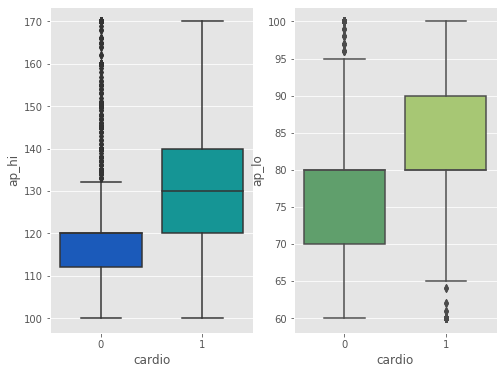

In [24]:
#investiate how ap_hi, ap_lo change with cardio states
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='ap_hi',data=df,palette='winter')
plt.subplot(1,2,2)
sns.boxplot(x='cardio',y='ap_lo',data=df,palette='summer')

It can be seen that the for patients having CVD they often have higher ap_hi and ap_lo vlues than those who don't have CVD.

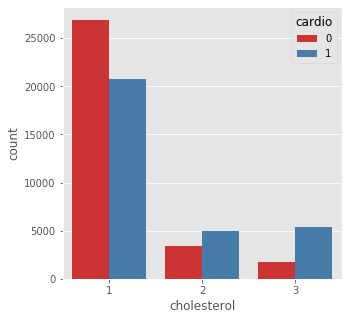

In [25]:
#investiate how the number of patients on each level of cholesterol and glucose change 
#with regard to the cardio states
combined = ["cholesterol", "gluc"]
rcParams['figure.figsize'] = 5, 5

sns.countplot(x="cholesterol", hue='cardio', data = df, palette="Set1")

#df_grouped = df.groupby(by='cardio')
#ax = df_grouped.boxplot(column='weight')

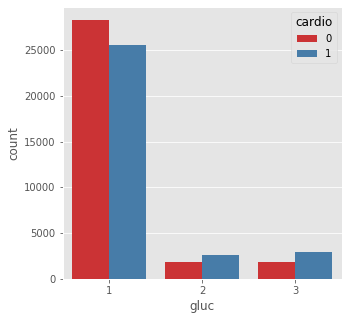

In [26]:
sns.countplot(x="gluc", hue='cardio', data = df, palette="Set1")

It can seen that at higher levels (>1) of glucose or cholesterol are correlated with more incidence of having CVD.  

### Explore Joint Attributes 

C:\ProgramData\Anaconda3\envs\MSDS7331\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\envs\MSDS7331\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


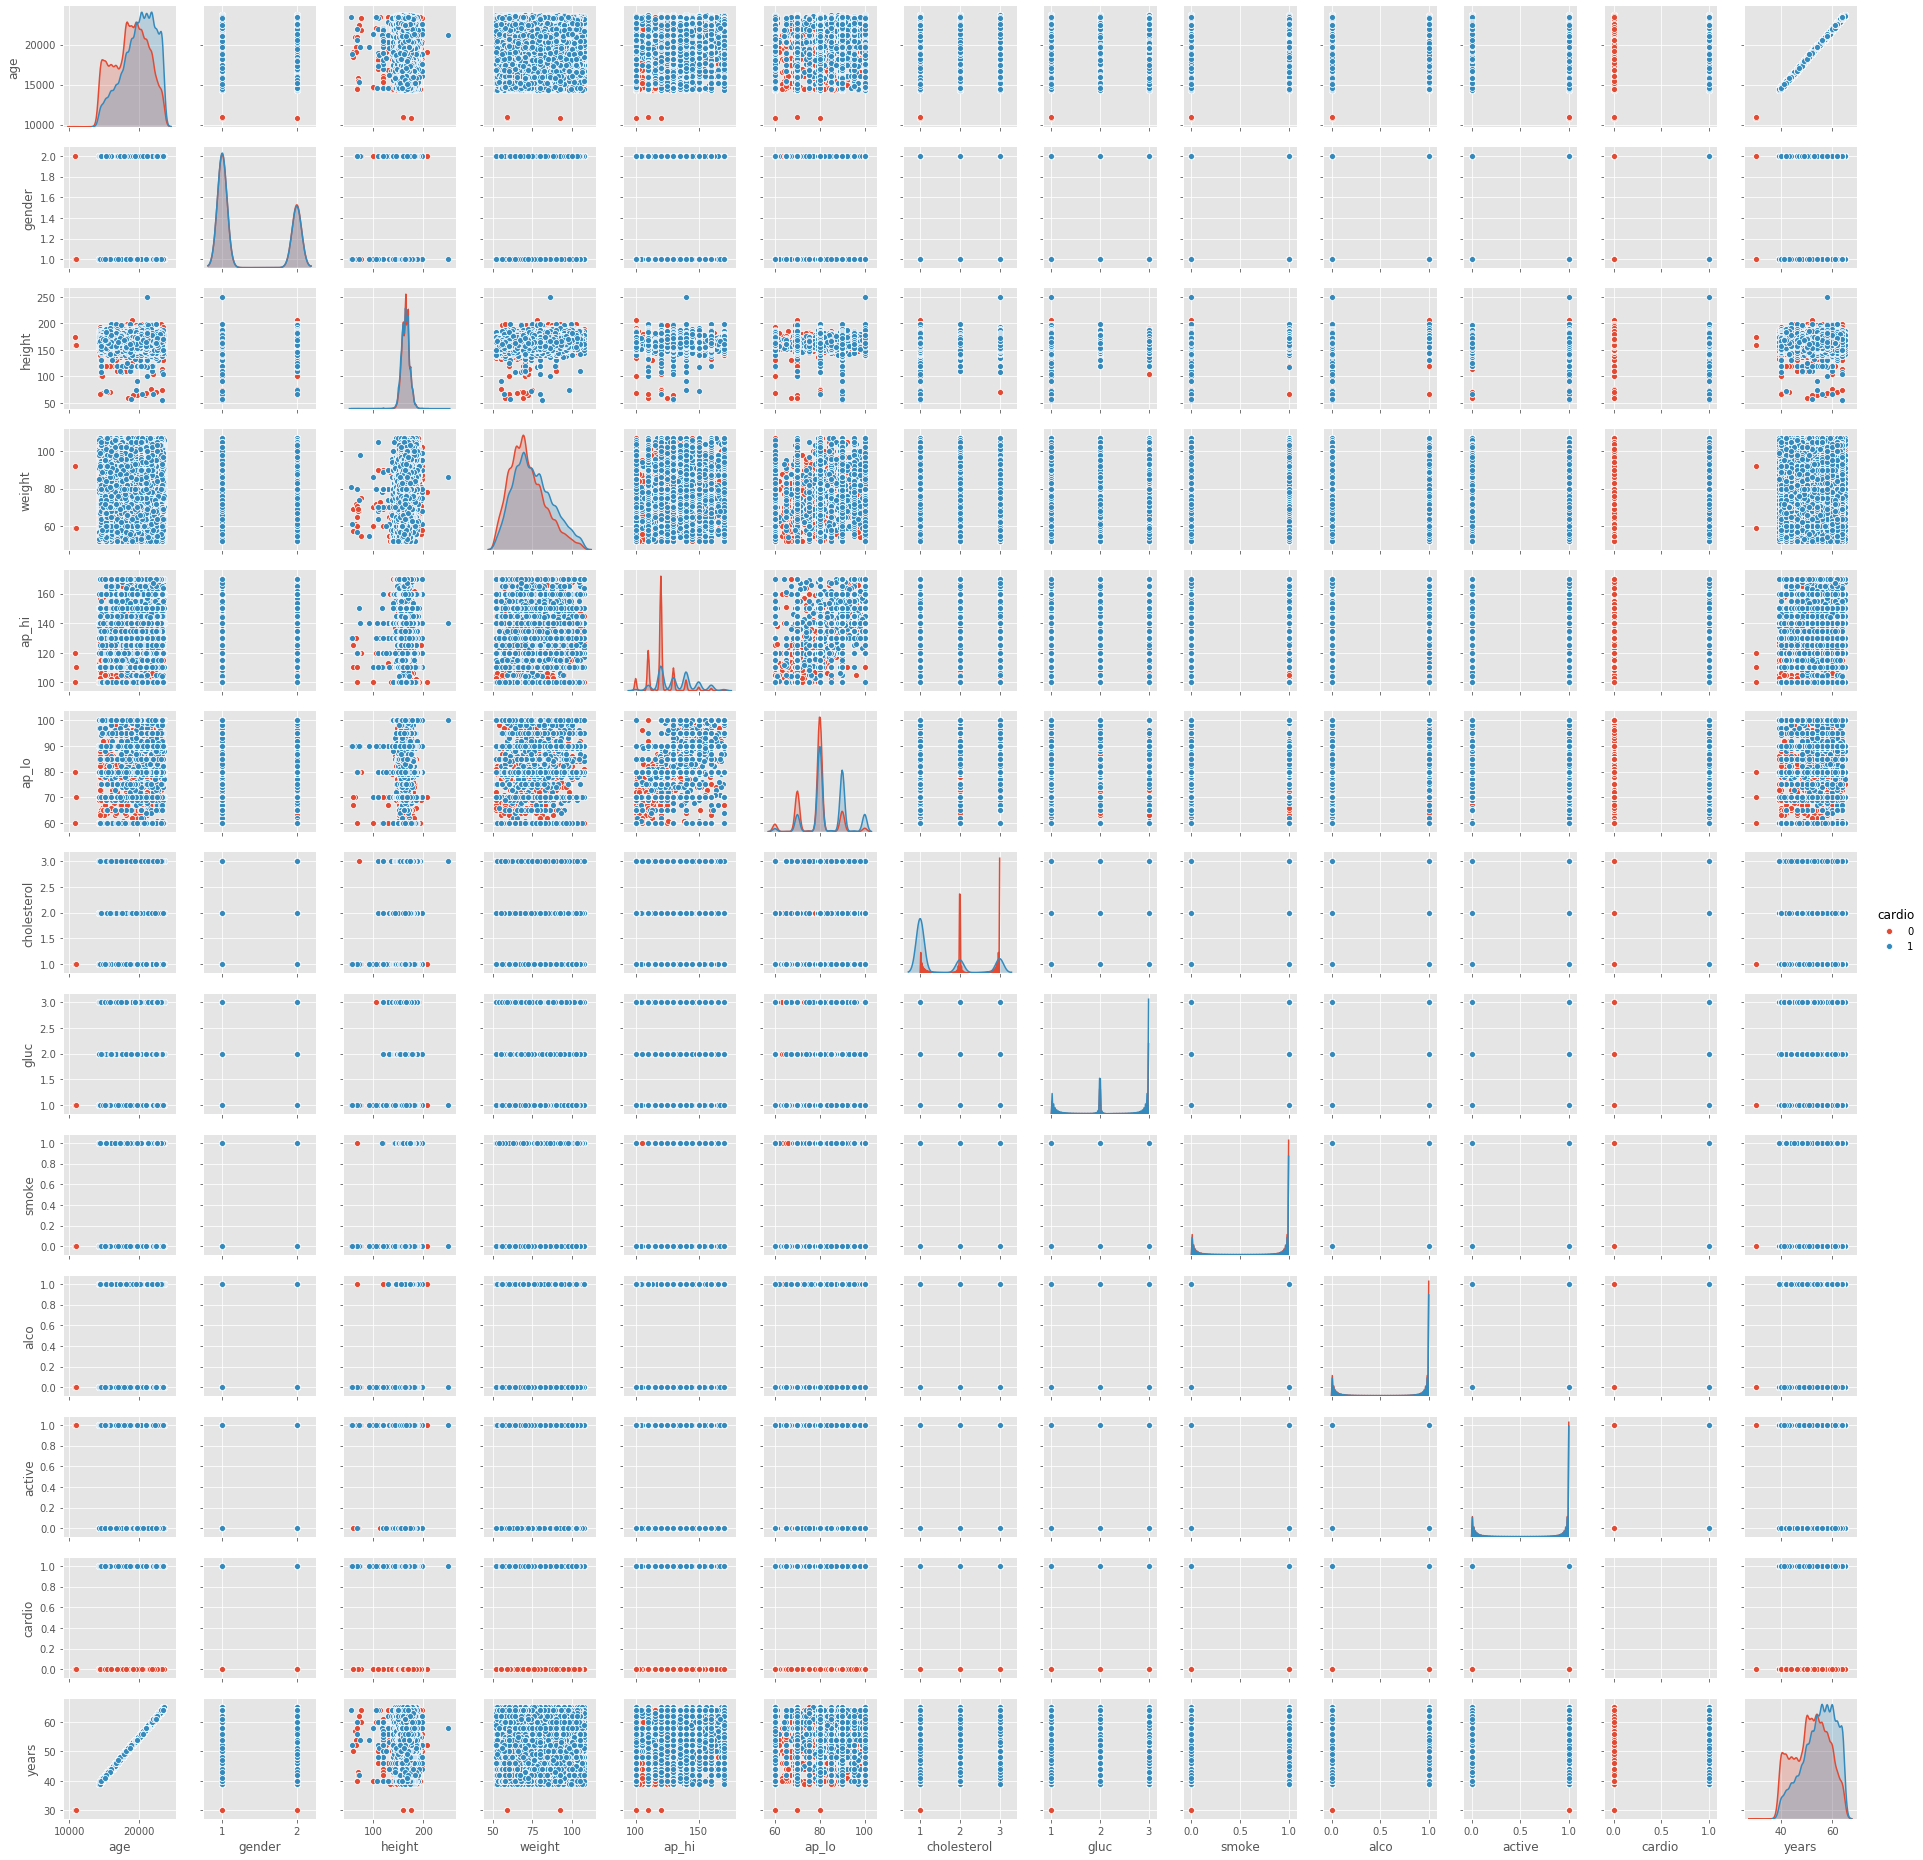

In [27]:
#using Seaborn to plot the scatterplot matrix
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
#df_imputed_jitter = df.copy()
#df_imputed_jitter[['Parch','SibSp','Pclass']] = df_imputed_jitter[['Parch','SibSp','Pclass']].values + np.random.rand(len(df_imputed_jitter),3)/2 
sns.pairplot(df, hue="cardio", height=2)

Becasue there are too many variables here, it is not easy to find something interesting from just looking at the total scatter plots. A better way is to find the correlation efficient for each pair. 

<Figure size 1080x1080 with 0 Axes>

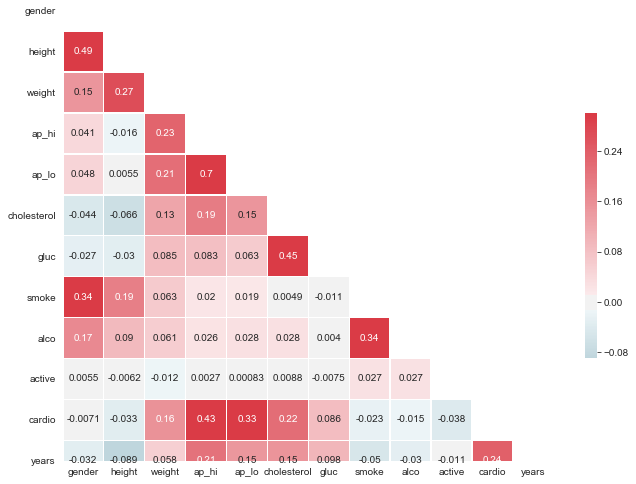

In [28]:
sns.set_style("whitegrid") 
#sns.set()

#we will drop the variable "age" but keep "years"
if 'age' in df:
    del df['age']

#plot the coorelation matrix
plt.figure(figsize=(15,15))
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

From above correlation matrix, it appears that ap_hi and ap_lo has a strong positive correlation (0.7), which makes sense. Height and weight have a positive correlation. It is true that generally tall people weight more than short people. Another noticeable correlation is between gluc and cholesterol. As noticed from earlier analysis, cardio state is positively correlated with ap_hi, ap_lo, age, cholesterol, and, weight, and gluc in deccreasing order. Other interesting correlations are smoke and gender, smoke and alcoholic. It suggests that more males are smoker and a smoker is more likely to be alcoholic than a non-smoker. The following are the plots for some of the paired variables which have relative strong correlation (correlatoin efficient > 0.3). The variables correlate well with cardio will be described in the next section.   

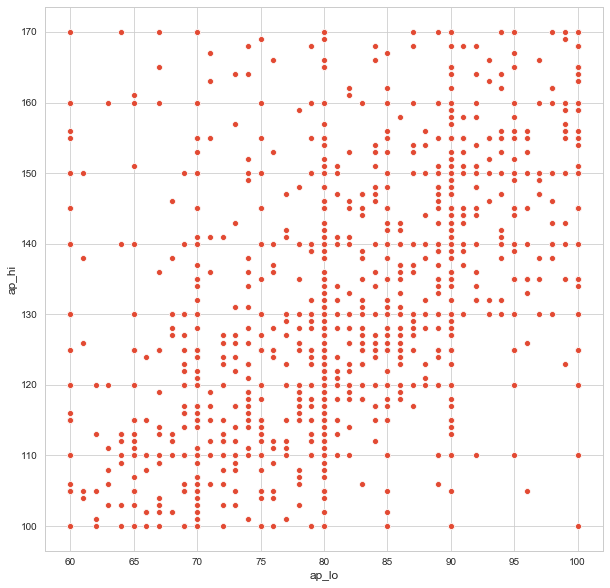

In [29]:
#scatter plot for ap_hi and ap_lo
plt.figure(figsize=(10,10))
sns.scatterplot(x='ap_lo',y='ap_hi',data=df)

Obviously, we can see a positive correlation between ap_lo and ap_hi.

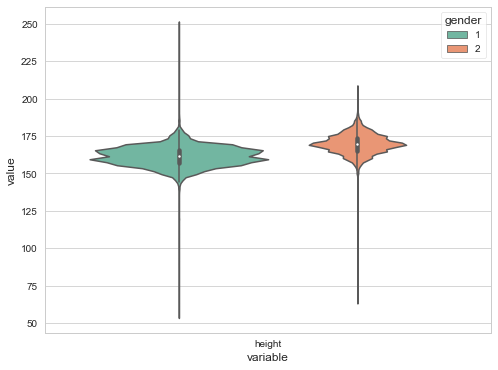

In [30]:
#displaying the relation between height and gender
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(8, 6))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=False, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

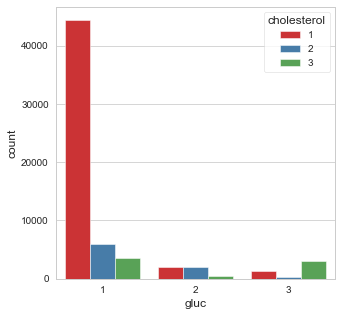

In [31]:
#displaying the relation between glucose and cholesterol
sns.countplot(x="gluc", hue='cholesterol', data = df, palette="Set1")

The above bargraph shows that at lower level of glucose, the percent of people with high cholesterol level is low. With the increase of glucose level to 3, the percentage of people having high lelvel of cholesterol (level 3) increases significantly. 

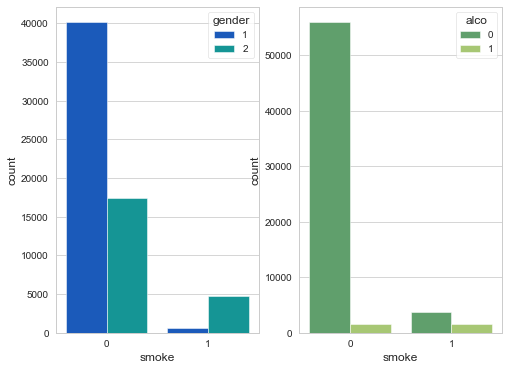

In [32]:
#displaying the relation between smoke and gender, smoke and alco
plt.figure(figsize=(8, 6))
plt.subplot(1,2,1)
sns.countplot(x='smoke', hue='gender',data=df,palette='winter')
plt.subplot(1,2,2)
sns.countplot(x='smoke', hue='alco',data=df,palette='summer')


From above bargraphs we can find that smoking people correspond more to male and more to people who also comsume alcohol. 

### Explore Relationships between Attributes and Target

From correlation matrix plot, we have found that cardio state is positively correlated with ap_hi, ap_lo, years, cholesterol, weight, and gluc. Let's demonstrate that with a scatter plot matrix. 

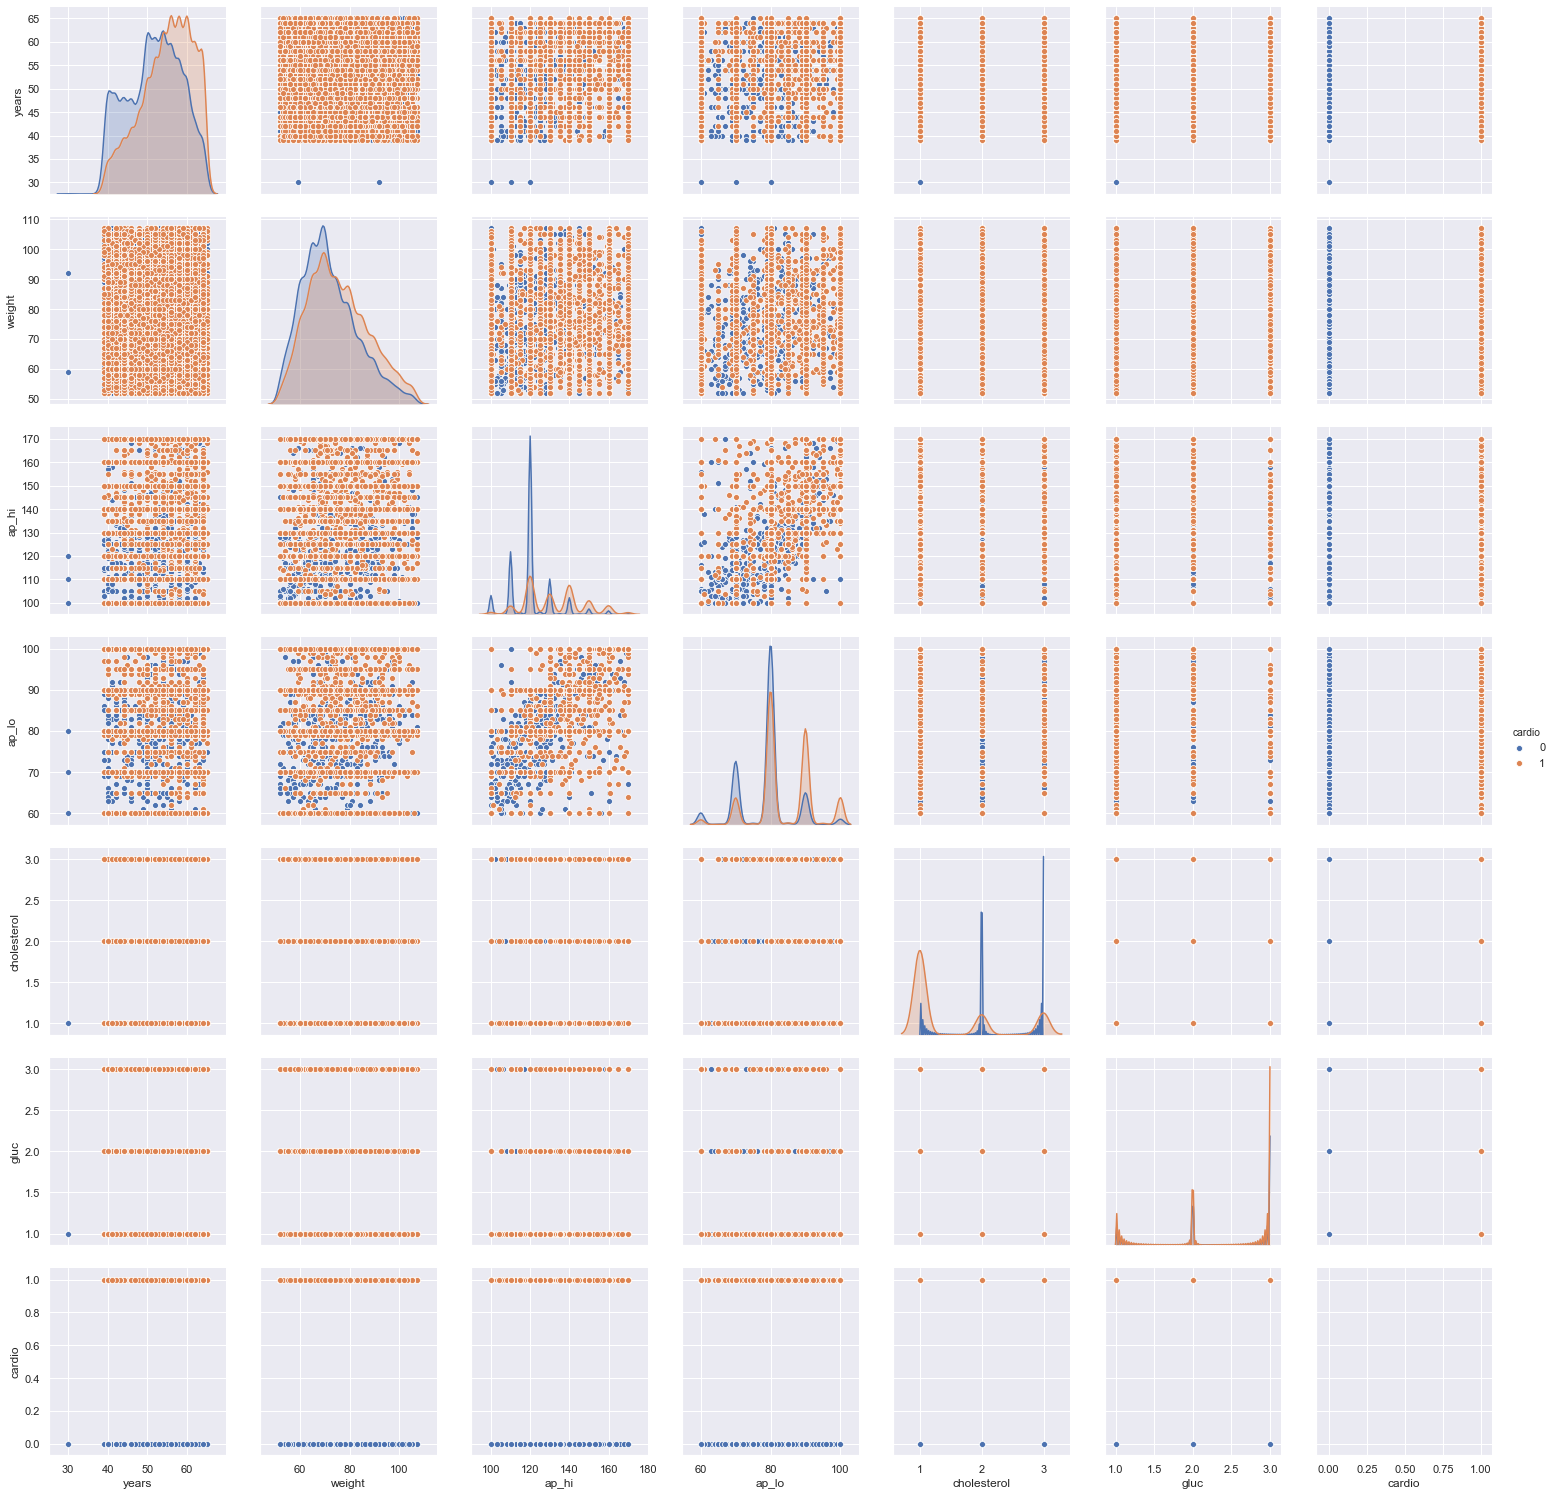

In [33]:
#using Seaborn to plot the scatterplot matrix for cardio-related variables
#import seaborn as sns
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
#df_imputed_jitter = df[['years','weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']].copy()
#df_imputed_jitter[['age','weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc' ]] = df_imputed_jitter[['age','weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']].values + np.random.rand(len(df_imputed_jitter),6)/2 
sns.pairplot(df[['years','weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'cardio']], hue="cardio", height=3)

Let's look at some of the above relationships more closely.

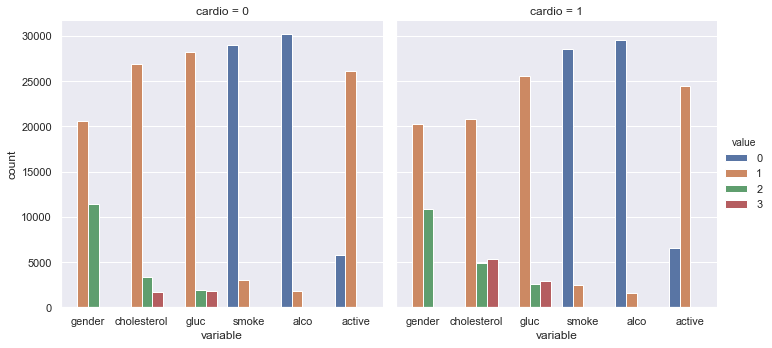

In [34]:
# divide the counts for categorical variables
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['gender','cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count")

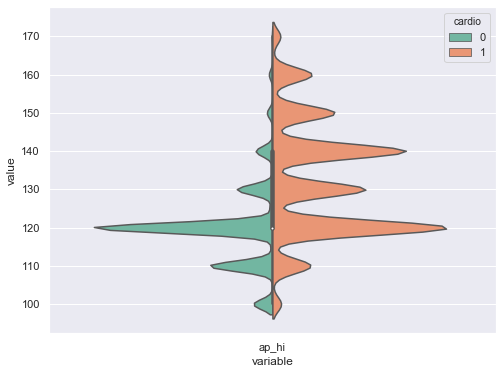

In [35]:
df_melt = pd.melt(frame=df, value_vars=['ap_hi'], id_vars=['cardio'])
plt.figure(figsize=(8, 6))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='cardio', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

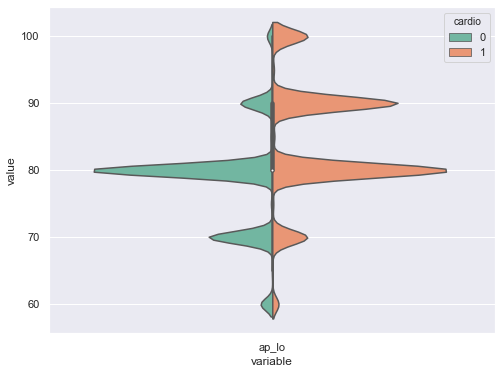

In [36]:
df_melt = pd.melt(frame=df, value_vars=['ap_lo'], id_vars=['cardio'])
plt.figure(figsize=(8, 6))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='cardio', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

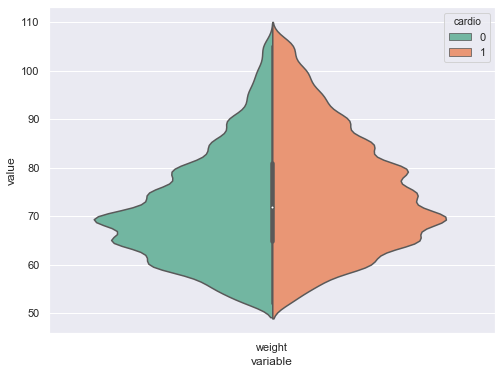

In [37]:
df_melt = pd.melt(frame=df, value_vars=['weight'], id_vars=['cardio'])
plt.figure(figsize=(8, 6))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='cardio', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

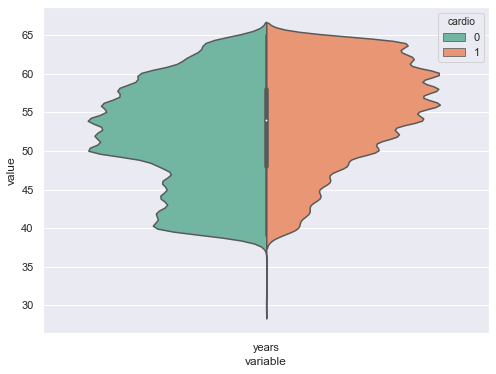

In [38]:
df_melt = pd.melt(frame=df, value_vars=['years'], id_vars=['cardio'])
plt.figure(figsize=(8, 6))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='cardio', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

It can be seen from above graphs that patients with CVD have higher ap_hi and ap_lo vlaues; more people have higher level of cholecterol and glucose; are older and less active, generally speaking. The values for gender, smoke and alco don't change much from being healthy to being in a cardio disease state.

Let's look at some other relationships involving cardio.

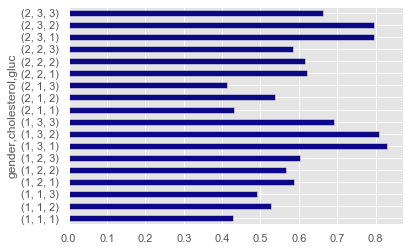

In [39]:
#check if male and female have similar rates of getting cardio disease

plt.style.use('ggplot')
%matplotlib inline

df_grouped = df.groupby(by=['gender','cholesterol', 'gluc'])
cardio_rate = df_grouped.cardio.sum() / df_grouped.cardio.count()
ax=cardio_rate.plot(kind='barh', colormap = "plasma") #or survival_rate.plot(kind='barh')

The above graph suggests that in terms of getting the cardio disease or not, gender is not that critical. On the other hand, the cholesterol level has a positive correlation with cardio-rate. Higher cholesterol levels correspond to higher rates of getting CVD. This is consistent with what we saw from the correlation matrix data. Glucose level also plays some roles here. Interestingly, it seems that higher level of glucose is associated with lower CVD rate. For example, when glucose level is 3, keeping other two variables the same, the rate of CVD is decreased.

### Other Features That Could Be Added

Body mass index (BMI) is commonly used in medical field. It is a key index for relating weight to height. BMI is a person's weight in kilograms (kg) divided by his or her height in meters squared.

In [40]:
#define BMI
df['BMI'] = df['weight']/((df['height']/100)**2)
# converting BMI range to categorical as 1 = underweight,2 = normal, 3 = overweight and 4 = obese
df['BMI'] = df['BMI'].apply(lambda x: 1 if x<18.5 else(2 if x>=18.5 and x<25 else( 3 if x >= 25 and x < 30 else 4)))

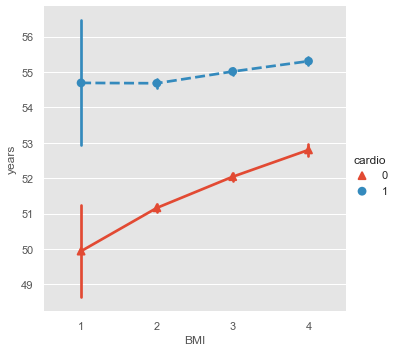

In [41]:
sns.catplot(x="BMI", y="years", hue="cardio",kind="point",data=df,markers=["^", "o"], linestyles=["-", "--"]);

As above plot shows avarege age for patients having CVD is almost constatnt for diffrent BMIs (around 55 years old).

In [42]:
#df = pd.read_csv('data/cardio_train.csv', sep=';') #read in the csv file
df.to_csv('data/cardio_clean.csv')

## Exceptional Work

### Using PCA to reduce the dimentions

In [43]:
from sklearn.preprocessing import StandardScaler
features = ["gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active", "years"]

# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:, ['cardio']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [44]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.19082101 0.17223392 0.11828677 0.10132995 0.08996916 0.08146442
 0.07158343 0.0566309  0.04869254 0.04162946 0.02735844]


Therefore, the first PC explaied 19% of the overall variance, second PC 17.2%, and so on. Let's plot the result. 

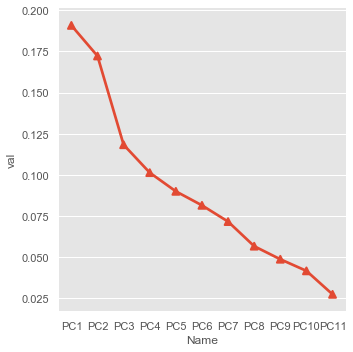

In [45]:
lst=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11"]
lst2 = explained_variance
df_PCA = pd.DataFrame(list(zip(lst, lst2)), 
               columns =['Name', 'val']) 
sns.catplot(x="Name", y="val",kind="point", data=df_PCA, markers=["^"], linestyles=["-"])

The above plot suggests that one or two components (PC1 and PC2) are not enough to explain all the variance in the data. We may need all the variables. 

In [46]:
#let's check if we can get a good separation on cardio state by only using two PCs 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


# print the components
print ('pca:', pca.components_)

pca: [[ 0.22918751  0.18658763  0.36721224  0.52036009  0.50390753  0.31157578
   0.23139488  0.17883413  0.1552214   0.00465959  0.21539685]
 [-0.50635909 -0.48001588 -0.11437486  0.20163772  0.17672491  0.24967631
   0.20668031 -0.42110223 -0.301608   -0.02130579  0.23326107]]


Text(0, 0.5, 'P2')

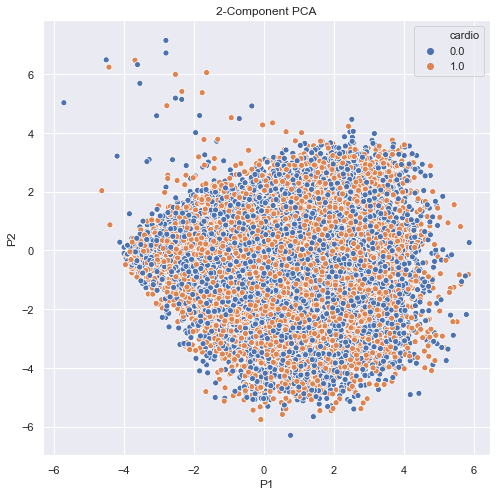

In [47]:
finalDf = pd.concat([principalDf, df[['cardio']]], axis = 1)

sns.set()
fig = plt.figure(figsize = (8,8))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cardio",  data=finalDf)
# Set title
plt.title('2-Component PCA')

# Set x-axis label
plt.xlabel('P1')

# Set y-axis label
plt.ylabel('P2')

As expected, using only two PCs, PC1 and PC2, didn't give us good separation on cardio states.  

### Balancing out the data entries on gender

As we mentioned before the number of Female is almost 2 times as many as that of Male and it may affect on the mean/median of weight,height and age. so we decided to use pandas random sampling technique to remove 50% of Females from dataset.

In [48]:
df_Female50 = df[(df['gender']==1)].sample(frac=0.5,random_state=1)
df_new=df.drop(df_Female50.index)
df_new.shape
df_new['gender'].value_counts()

2    22243
1    20406
Name: gender, dtype: int64

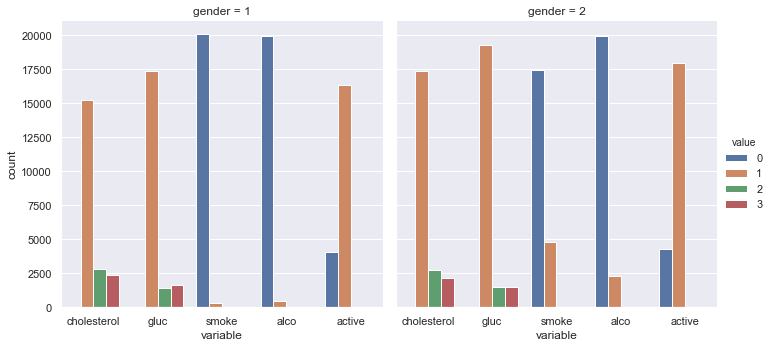

In [49]:
df_long = pd.melt(df_new, id_vars=['gender'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="gender",
                data=df_long, kind="count");

In [50]:
df[df.gender == 1].describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,BMI
count,40812.0,40812.000000,40812.000000,40812.000000,40812.000000,40812.000000,40812.000000,40812.000000,40812.000000,40812.000000,40812.000000,40812.000000,40812.000000
mean,1.0,161.662330,72.350592,125.780138,80.888121,1.377879,1.231746,0.016760,0.024870,0.801897,0.495614,53.533005,2.935877
std,0.0,6.898025,11.690820,14.424434,8.401162,0.689969,0.581168,0.128372,0.155731,0.398575,0.499987,6.632050,0.801930
min,1.0,55.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000
25%,1.0,157.000000,64.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,50.000000,2.000000
50%,1.0,162.000000,70.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,3.000000
75%,1.0,166.000000,80.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,4.000000
max,1.0,250.000000,107.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,4.000000


In [51]:
df[df.gender == 2].describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,BMI
count,22243.0,22243.000000,22243.000000,22243.000000,22243.000000,22243.000000,22243.000000,22243.000000,22243.000000,22243.000000,22243.000000,22243.000000,22243.000000
mean,2.0,169.838691,76.064497,127.005080,81.721261,1.315560,1.200243,0.215933,0.103988,0.806456,0.488199,53.086589,2.749494
std,0.0,7.036775,11.666279,14.087282,8.183149,0.640062,0.541179,0.411477,0.305252,0.395084,0.499872,6.951148,0.732319
min,2.0,65.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000
25%,2.0,165.000000,68.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,2.000000
50%,2.0,170.000000,75.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,3.000000
75%,2.0,174.000000,84.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,3.000000
max,2.0,207.000000,107.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,4.000000


Acording to above analysis,  making the numbers of female and men entries even does not make noticeable changes to our pervious assumption that gender is not that significantly correlated on having CVD.